In [ ]:
import numpy as np
from sklearn.datasets import make_regression

In [ ]:
x,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1, noise=80, random_state=13)

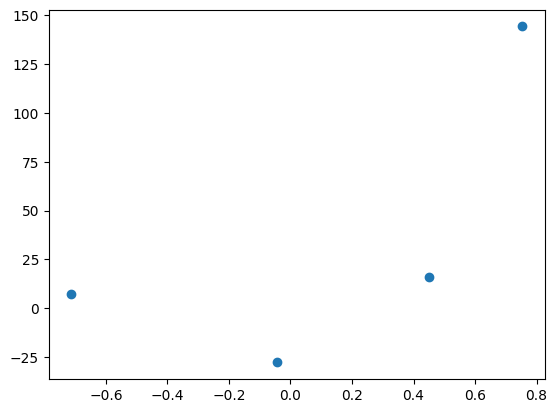

In [ ]:
# This is the dataset that given to us
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [ ]:
# Let's apply OLS (ordinary least sqaure)
# OLS is nothing but a scikit-learn LinearRegression model, so that we got to know slope and intercept previously
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [ ]:
reg.coef_

array([78.35063668])

In [ ]:
reg.intercept_

26.15963284313262

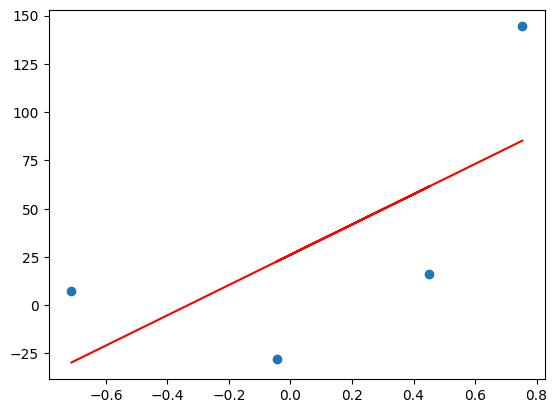

In [ ]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color="red")

In [ ]:
# our goal is to reach at y-intercept, and its value is nothing but 26.15
# Initially we don't know about our b(y-intercept), we know slope only, so, initially we start our b with 0
# and then reach to 26.15 with the help of gradient descent equation

# b_new = b_old - n(learning_rate) * slope

In [ ]:
# let's apply our gradient descent assuming slope is constant m=78.35
# and let's assume the starting value for intercept b=0
y_pred = ((78.35*x)+0).reshape(4)

In [ ]:
y_pred

array([-55.81580837,  35.39949674,  -3.48681619,  59.05759577])

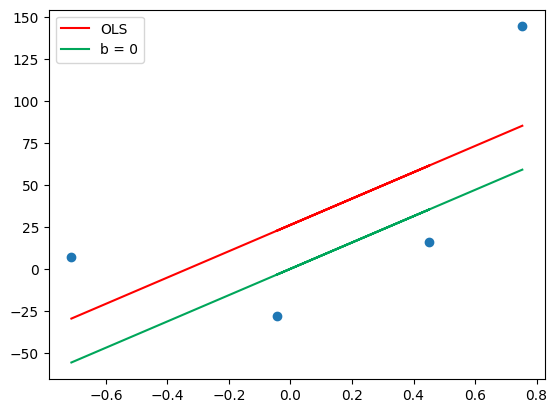

In [ ]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color="Red",label="OLS")
plt.plot(x,y_pred,color="#00a65a",label="b = 0")
plt.legend()
plt.show()

In [ ]:
m=78.35
b=0
loss_slope = -2*np.sum(y-m*x.ravel()-b)
loss_slope

-209.27763408209216

In [ ]:
# let's take learning rate = 0.1
lr=0.1
step_size = lr*loss_slope
step_size

-20.927763408209216

In [ ]:
# calculating the new_intercept
# step size is nothing but a learning rate*loss_slope
b_new = b - step_size
b_new

20.927763408209216

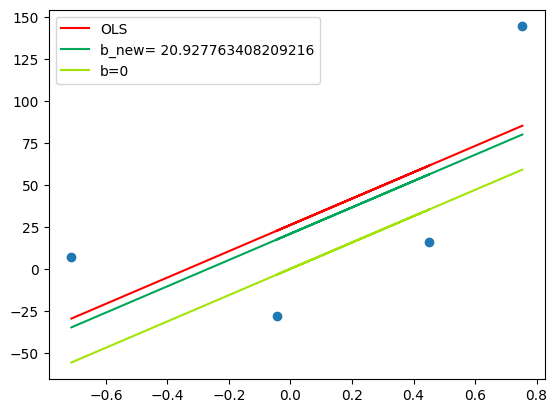

In [ ]:
y_pred1 = ((78.35 * x)+b_new).reshape(4)
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color="red",label="OLS")
plt.plot(x,y_pred1,color="#00a65a",label="b_new= {}".format(b_new))
plt.plot(x,y_pred,color="#A3E407",label="b=0")
plt.legend()
plt.show()

In [ ]:
# Iteration - 2
loss_slope = -2*np.sum(y-m*x.ravel()-b_new)
loss_slope

-41.85552681641843

In [ ]:
step_size = loss_slope*lr
step_size

-4.185552681641844

In [ ]:
b_new2 = b_new - step_size
b_new2

25.11331608985106

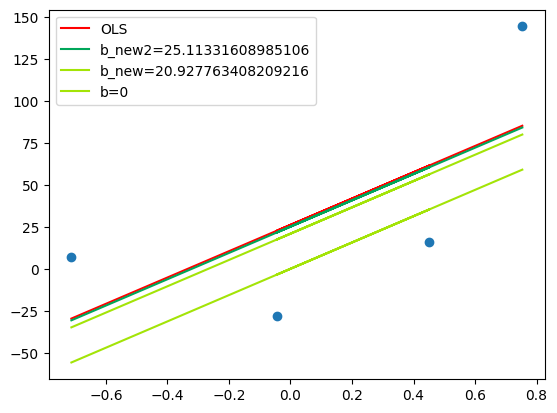

In [ ]:
y_pred2 = ((78.35 * x)+b_new2).reshape(4)
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color="red",label="OLS")
plt.plot(x,y_pred2,color="#00a65a",label="b_new2={}".format(b_new2))
plt.plot(x,y_pred1,color="#A3E407",label="b_new={}".format(b_new))
plt.plot(x,y_pred,color="#A3E407",label="b=0")
plt.legend()
plt.show()

In [ ]:
# Iteration-3
loss_slope = -2*np.sum(y-m*x.ravel()-b_new2)
loss_slope

-8.371105363283675

In [ ]:
step_size = loss_slope*lr
step_size

-0.8371105363283675

In [ ]:
b_new3 = b_new2-step_size
b_new3

25.95042662617943

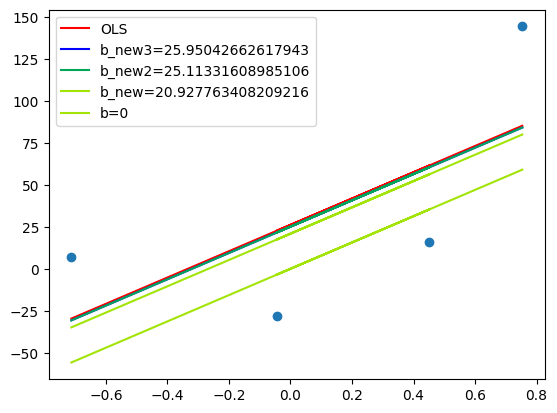

In [ ]:
y_pred3 = ((78.35 * x)+b_new2).reshape(4)
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color="red",label="OLS")
plt.plot(x,y_pred3,color="blue",label="b_new3={}".format(b_new3))
plt.plot(x,y_pred2,color="#00a65a",label="b_new2={}".format(b_new2))
plt.plot(x,y_pred1,color="#A3E407",label="b_new={}".format(b_new))
plt.plot(x,y_pred,color="#A3E407",label="b=0")
plt.legend()
plt.show()

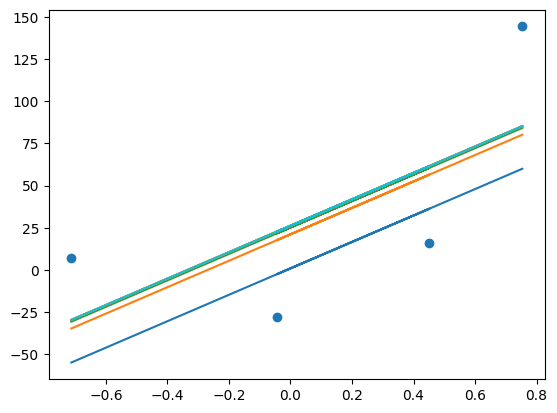

In [ ]:
b=-100
m=78.35
lr=0.1
epochs=10 # No.of Iterations
for i in range(epochs):
  loss_slope = -2*np.sum(y-m*x.ravel()-b)
  step_size = lr*loss_slope
  b = b - step_size
  y_pred = m*x + b
  plt.plot(x,y_pred)
plt.scatter(x,y)

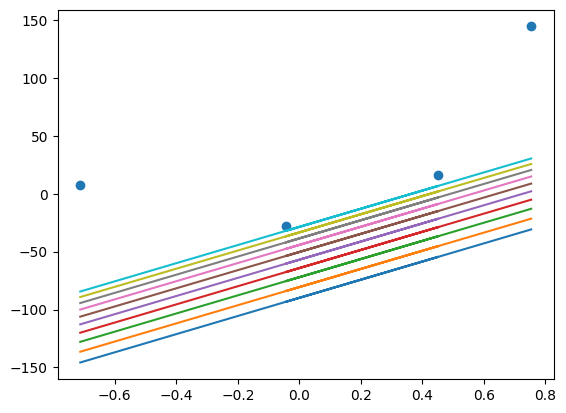

In [ ]:
# If we take small learning rate, it might happen that our epoch is may be sort and without reaching to there, our epoch is finished
b=-100
m=78.35
lr=0.01
epochs=10 # No.of Iterations
for i in range(epochs):
  loss_slope = -2*np.sum(y-m*x.ravel()-b)
  step_size = lr*loss_slope
  b = b - step_size
  y_pred = m*x + b
  plt.plot(x,y_pred)
plt.scatter(x,y)

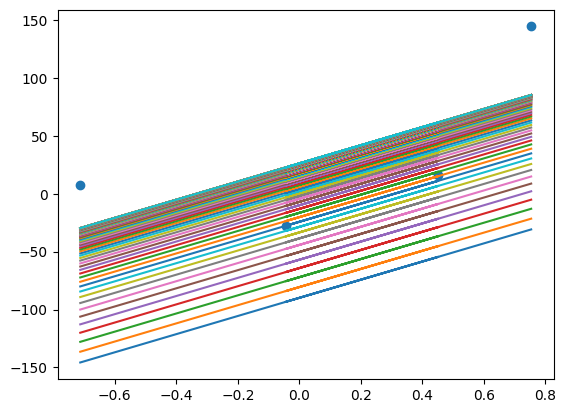

In [ ]:
# If we take small learning rate, it might happen that our epoch is may be sort and without reaching to there, our epoch is finished
b=-100
m=78.35
lr=0.01
epochs=100 # No.of Iterations
for i in range(epochs):
  loss_slope = -2*np.sum(y-m*x.ravel()-b)
  step_size = lr*loss_slope
  b = b - step_size
  y_pred = m*x + b
  plt.plot(x,y_pred)
plt.scatter(x,y)

# Gradient descent code from scratch

# Second Example

### We know the value of M and we are keeping it as constant and we are changing only value of b.

In [ ]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
x,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20)

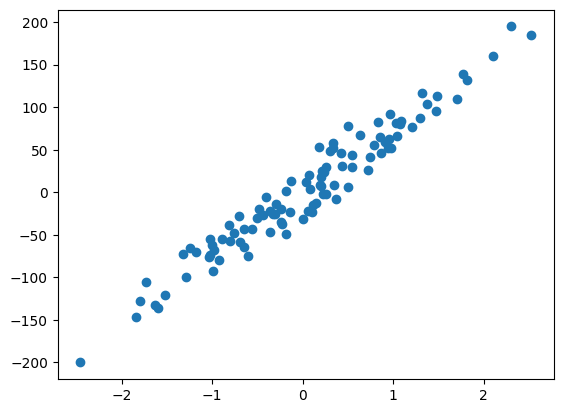

In [ ]:
plt.scatter(x,y)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x,y)
print(lr.coef_)
print(lr.intercept_)

[73.46737007]
-0.5025091517597136


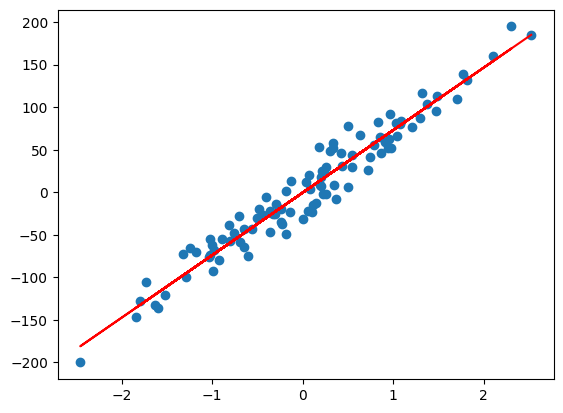

In [ ]:
plt.scatter(x,y)
plt.plot(x,lr.predict(x),color="red")

In [ ]:
m = 28.26
b = -4.23

In [ ]:
class GDRegressor:

  def __init__(self,learning_rate,epochs):
    self.m=28.26
    self.b=-120
    self.lr=learning_rate
    self.epochs=epochs

  def fit(self,x,y):
    # calculate the b using gd
    for i in range(self.epochs):
      loss_slope = -2 * np.sum(y-self.m*x.ravel()-self.b)
      self.b = self.b - (self.lr * loss_slope)
      print(loss_slope, self.b)
    print(self.b)

In [ ]:
gd = GDRegressor(0.001,100)

In [ ]:
gd.fit(x,y)

-24393.219157962147 -95.60678084203785
-19514.575326369715 -76.09220551566813
-15611.66026109577 -60.480545254572355
-12489.328208876614 -47.99121704569574
-9991.462567101293 -37.99975447859445
-7993.170053681033 -30.006584424913413
-6394.5360429448265 -23.612048381968584
-5115.628834355861 -18.496419547612724
-4092.503067484689 -14.403916480128036
-3274.002453987751 -11.129914026140284
-2619.2019631902003 -8.510712062950084
-2095.3615705521615 -6.4153504923979225
-1676.2892564417286 -4.739061235956194
-1341.0314051533833 -3.3980298308028103
-1072.8251241227065 -2.325204706680104
-858.2600992981647 -1.4669446073819392
-686.6080794385321 -0.7803365279434071
-549.2864635508255 -0.23105006439258158
-439.4291708406605 0.20837910644807894
-351.5433366725287 0.5599224431206077
-281.23466933802274 0.8411571124586305
-224.98773547041793 1.0661448479290483
-179.99018837633463 1.246135036305383
-143.99215070106754 1.3901271870064504
-115.1937205608542 1.5053209075673046
-92.15497644868333 1.5974

# Third Example
### we do not know the value of m and b, we are starting both with random value

In [ ]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
x,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)

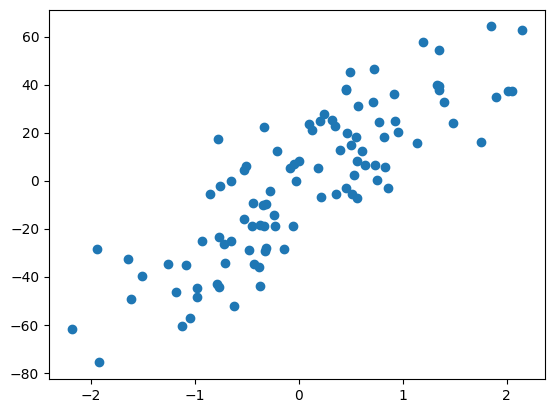

In [ ]:
plt.scatter(x,y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783825


In [ ]:
y_pred = lr.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6345158782661012

In [ ]:
class GDRegressor:

  def __init__(self,learning_rate,epochs):
    self.m=100
    self.b=-120
    self.lr=learning_rate
    self.epochs=epochs

  def fit(self,x,y):
    # calculate the b using gd
    for i in range(self.epochs):
      loss_slope_b = -2 * np.sum(y-self.m*x.ravel()-self.b)
      loss_slope_m = -2 * np.sum((y-self.m*x.ravel()-self.b)*x.ravel())
      self.b = self.b - (self.lr * loss_slope_b)
      self.m = self.m - (self.lr * loss_slope_m)
    print(self.m,self.b)

  def predict(self,x):
    return self.m * x+self.b

In [ ]:
gd = GDRegressor(0.001,50)

In [ ]:
gd.fit(x_train,y_train)

28.159367347119066 -2.3004574196824854


In [ ]:
y_pred = gd.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6343842836315579